# importing libraries

In [252]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

# Load dataset

In [253]:
vehicle_data = pd.read_csv('vechile_price_dataset.csv')

In [254]:
vehicle_data.head()

,Unnamed: 0,Make,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Vehicle Size,city mpg,Popularity,MSRP
0,479,Toyota,regular unleaded,270.0,6.0,AUTOMATIC,rear wheel drive,Midsize,17,2031,41365
1,480,Toyota,regular unleaded,270.0,6.0,AUTOMATIC,rear wheel drive,Midsize,17,2031,35740
2,481,Toyota,regular unleaded,270.0,6.0,AUTOMATIC,four wheel drive,Midsize,17,2031,37615
3,482,Toyota,regular unleaded,270.0,6.0,AUTOMATIC,four wheel drive,Midsize,17,2031,34695
4,483,Toyota,regular unleaded,270.0,6.0,AUTOMATIC,four wheel drive,Midsize,17,2031,35725


# Data Size

In [255]:
vehicle_data.shape

(2112, 11)

# List of columns

In [256]:
vehicle_data.columns

Index(['Unnamed: 0', 'Make', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Vehicle Size', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

# Columns datatypes

In [257]:
vehicle_data.dtypes

Unnamed: 0             int64
Make                  object
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Vehicle Size          object
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

# data information

In [258]:
vehicle_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2112 entries, 0 to 2111
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         2112 non-null   int64  
 1   Make               2112 non-null   object 
 2   Engine Fuel Type   2112 non-null   object 
 3   Engine HP          2097 non-null   float64
 4   Engine Cylinders   2107 non-null   float64
 5   Transmission Type  2112 non-null   object 
 6   Driven_Wheels      2112 non-null   object 
 7   Vehicle Size       2112 non-null   object 
 8   city mpg           2112 non-null   int64  
 9   Popularity         2112 non-null   int64  
 10  MSRP               2112 non-null   int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 181.6+ KB


# Dropping Columns

In [259]:
vehicle_data=vehicle_data.drop(['Unnamed: 0'],axis=1)

# Rename Columns

In [260]:
vehicle_data1 = vehicle_data.rename(columns={
    'Engine Fuel Type': 'Fuel_Type',
    'Engine HP': 'Power_HP',
    'Engine Cylinders': 'No_of_Cylinders',
    'Transmission Type': 'Transmission',
    'Vehicle Size': 'Vehicle_size',
    'city mpg': 'Mileage_mpg'})

vehicle_data1.head()

,Make,Fuel_Type,Power_HP,No_of_Cylinders,Transmission,Driven_Wheels,Vehicle_size,Mileage_mpg,Popularity,MSRP
0,Toyota,regular unleaded,270.0,6.0,AUTOMATIC,rear wheel drive,Midsize,17,2031,41365
1,Toyota,regular unleaded,270.0,6.0,AUTOMATIC,rear wheel drive,Midsize,17,2031,35740
2,Toyota,regular unleaded,270.0,6.0,AUTOMATIC,four wheel drive,Midsize,17,2031,37615
3,Toyota,regular unleaded,270.0,6.0,AUTOMATIC,four wheel drive,Midsize,17,2031,34695
4,Toyota,regular unleaded,270.0,6.0,AUTOMATIC,four wheel drive,Midsize,17,2031,35725


In [261]:
vehicle_data1.columns

Index(['Make', 'Fuel_Type', 'Power_HP', 'No_of_Cylinders', 'Transmission',
       'Driven_Wheels', 'Vehicle_size', 'Mileage_mpg', 'Popularity', 'MSRP'],
      dtype='object')

# check for duplicate records

In [262]:
vehicle_data1[vehicle_data1.duplicated(subset = ['Make','Fuel_Type','Power_HP','No_of_Cylinders','Transmission',
       'Driven_Wheels', 'Vehicle_size', 'Mileage_mpg', 'Popularity'],keep ='first')]

,Make,Fuel_Type,Power_HP,No_of_Cylinders,Transmission,Driven_Wheels,Vehicle_size,Mileage_mpg,Popularity,MSRP
1,Toyota,regular unleaded,270.0,6.0,AUTOMATIC,rear wheel drive,Midsize,17,2031,35740
3,Toyota,regular unleaded,270.0,6.0,AUTOMATIC,four wheel drive,Midsize,17,2031,34695
4,Toyota,regular unleaded,270.0,6.0,AUTOMATIC,four wheel drive,Midsize,17,2031,35725
5,Toyota,regular unleaded,270.0,6.0,AUTOMATIC,four wheel drive,Midsize,17,2031,43400
6,Toyota,regular unleaded,270.0,6.0,AUTOMATIC,rear wheel drive,Midsize,17,2031,32820
...,...,...,...,...,...,...,...,...,...,...
2107,Toyota,regular unleaded,106.0,4.0,MANUAL,front wheel drive,Compact,30,2031,15250
2108,Toyota,regular unleaded,106.0,4.0,AUTOMATIC,front wheel drive,Compact,30,2031,16375
2109,Toyota,regular unleaded,106.0,4.0,AUTOMATIC,front wheel drive,Compact,30,2031,17285
2110,Toyota,regular unleaded,106.0,4.0,AUTOMATIC,front wheel drive,Compact,30,2031,18000


# Drop Duplicate Records

In [263]:
vehicle_data2 = vehicle_data1.drop_duplicates(subset = ['Make','Fuel_Type','Power_HP','No_of_Cylinders','Transmission',
       'Driven_Wheels', 'Vehicle_size', 'Mileage_mpg', 'Popularity'],keep ='first')

In [264]:
vehicle_data2.shape

(406, 10)

# checking for null/missing values

In [265]:
vehicle_data2.isnull().sum()

Make               0
Fuel_Type          0
Power_HP           5
No_of_Cylinders    2
Transmission       0
Driven_Wheels      0
Vehicle_size       0
Mileage_mpg        0
Popularity         0
MSRP               0
dtype: int64

# Missing Value Imputation

In [266]:
power_mean = vehicle_data2['Power_HP'].mean()
power_mean


214.00498753117208

In [267]:
cylinder_mode = vehicle_data2[ 'No_of_Cylinders'].mode()
cylinder_mode[0]

4.0

In [268]:
vehicle_data2['Power_HP'] = vehicle_data2['Power_HP'].fillna(power_mean)
vehicle_data2['No_of_cylinders'] = vehicle_data2['No_of_Cylinders'].fillna(cylinder_mode[0])

C:\Users\SRUJAN\AppData\Local\Temp\ipykernel_32956\1352498886.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vehicle_data2['Power_HP'] = vehicle_data2['Power_HP'].fillna(power_mean)
C:\Users\SRUJAN\AppData\Local\Temp\ipykernel_32956\1352498886.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vehicle_data2['No_of_cylinders'] = vehicle_data2['No_of_Cylinders'].fillna(cylinder_mode[0])


In [269]:
vehicle_data2.isnull().sum()

Make               0
Fuel_Type          0
Power_HP           0
No_of_Cylinders    2
Transmission       0
Driven_Wheels      0
Vehicle_size       0
Mileage_mpg        0
Popularity         0
MSRP               0
No_of_cylinders    0
dtype: int64

# EDA(Exploratory Data Analysis) 

In [270]:
vehicle_data2.describe()

,Power_HP,No_of_Cylinders,Mileage_mpg,Popularity,MSRP,No_of_cylinders
count,406.000000,404.00000,406.000000,406.000000,406.000000,406.000000
mean,214.004988,5.30198,20.928571,3377.679803,25534.371921,5.295567
std,84.009523,1.54916,10.734843,2121.244431,17135.324044,1.548023
min,63.000000,0.00000,11.000000,873.000000,2000.000000,0.000000
25%,154.250000,4.00000,15.000000,873.000000,18148.750000,4.000000
50%,200.000000,5.00000,19.000000,2031.000000,25895.000000,5.000000
75%,266.000000,6.00000,23.000000,5657.000000,32250.000000,6.000000
max,662.000000,12.00000,126.000000,5657.000000,149995.000000,12.000000


In [271]:
vehicle_data2.Make.value_counts()

Ford          184
Toyota        118
Volkswagen    104
Name: Make, dtype: int64

<AxesSubplot:>

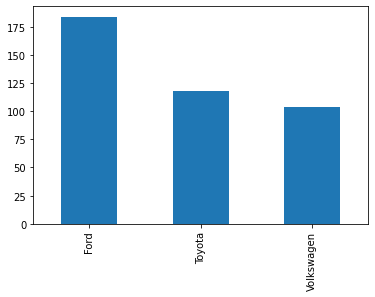

In [272]:
vehicle_data2.Make.value_counts().plot(kind='bar')

In [273]:
vehicle_data2.columns

Index(['Make', 'Fuel_Type', 'Power_HP', 'No_of_Cylinders', 'Transmission',
       'Driven_Wheels', 'Vehicle_size', 'Mileage_mpg', 'Popularity', 'MSRP',
       'No_of_cylinders'],
      dtype='object')

<AxesSubplot:>

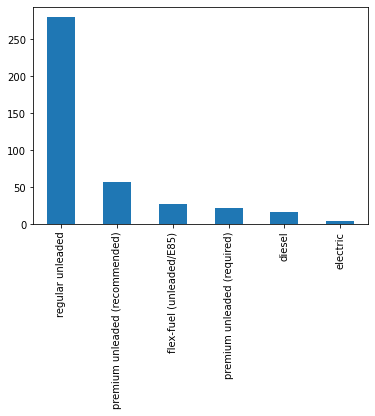

In [274]:
vehicle_data2.Fuel_Type.value_counts().plot(kind = 'bar')

<AxesSubplot:>

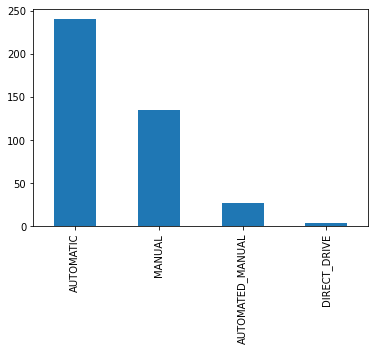

In [275]:
vehicle_data2.Transmission.value_counts().plot(kind = 'bar')

<AxesSubplot:>

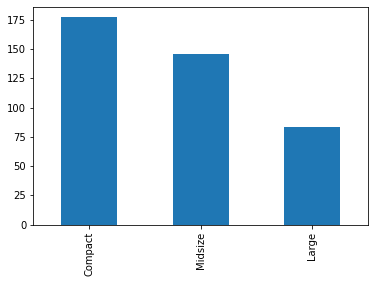

In [276]:
vehicle_data2.Vehicle_size.value_counts().plot(kind = 'bar')

<AxesSubplot:>

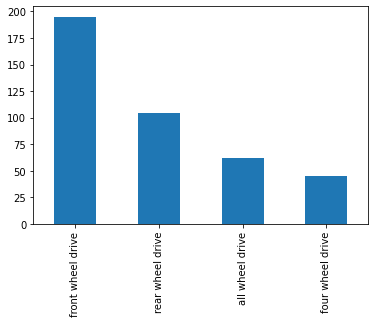

In [277]:
vehicle_data2.Driven_Wheels.value_counts().plot(kind ='bar')

<AxesSubplot:ylabel='Frequency'>

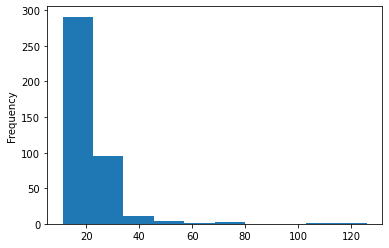

In [278]:
vehicle_data2['Mileage_mpg'].plot(kind = 'hist')

<AxesSubplot:ylabel='Frequency'>

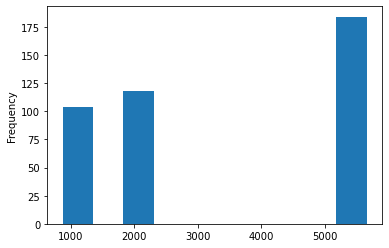

In [279]:
vehicle_data2['Popularity'].plot(kind ='hist')

<AxesSubplot:ylabel='Frequency'>

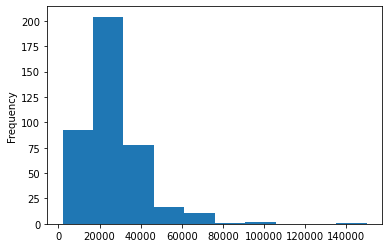

In [280]:
vehicle_data2['MSRP'].plot(kind = 'hist')

# Data Preprocessing

Label Encoding:

In [281]:
vehicle_data2.columns

Index(['Make', 'Fuel_Type', 'Power_HP', 'No_of_Cylinders', 'Transmission',
       'Driven_Wheels', 'Vehicle_size', 'Mileage_mpg', 'Popularity', 'MSRP',
       'No_of_cylinders'],
      dtype='object')

In [282]:
from sklearn.preprocessing import LabelEncoder
Le = LabelEncoder()

In [283]:
vehicle_data2['Make'] = Le.fit_transform(vehicle_data2[ 'Make'])
vehicle_data2['Fuel_Type'] = Le.fit_transform(vehicle_data2['Fuel_Type'])
vehicle_data2 ['Transmission'] = Le.fit_transform(vehicle_data2['Transmission'])
vehicle_data2['Driven_Wheels'] = Le.fit_transform(vehicle_data2['Driven_Wheels'])
vehicle_data2['Vehicle_size'] = Le.fit_transform(vehicle_data2[ 'Vehicle_size'])

C:\Users\SRUJAN\AppData\Local\Temp\ipykernel_32956\1144891498.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vehicle_data2['Make'] = Le.fit_transform(vehicle_data2[ 'Make'])
C:\Users\SRUJAN\AppData\Local\Temp\ipykernel_32956\1144891498.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vehicle_data2['Fuel_Type'] = Le.fit_transform(vehicle_data2['Fuel_Type'])
C:\Users\SRUJAN\AppData\Local\Temp\ipykernel_32956\1144891498.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

In [284]:
vehicle_data2.head()

,Make,Fuel_Type,Power_HP,No_of_Cylinders,Transmission,Driven_Wheels,Vehicle_size,Mileage_mpg,Popularity,MSRP,No_of_cylinders
0,1,5,270.0,6.0,1,3,2,17,2031,41365,6.0
2,1,5,270.0,6.0,1,1,2,17,2031,37615,6.0
26,1,3,205.0,4.0,3,3,0,21,2031,26255,4.0
27,1,3,200.0,4.0,1,3,0,24,2031,26975,4.0
28,0,5,135.0,6.0,1,3,2,16,5657,2000,6.0


# Dependent(Target) and independent Variable

In [285]:
X = vehicle_data2.drop(['MSRP'],axis =1)
y = vehicle_data2['MSRP']

In [286]:
X.head()

,Make,Fuel_Type,Power_HP,No_of_Cylinders,Transmission,Driven_Wheels,Vehicle_size,Mileage_mpg,Popularity,No_of_cylinders
0,1,5,270.0,6.0,1,3,2,17,2031,6.0
2,1,5,270.0,6.0,1,1,2,17,2031,6.0
26,1,3,205.0,4.0,3,3,0,21,2031,4.0
27,1,3,200.0,4.0,1,3,0,24,2031,4.0
28,0,5,135.0,6.0,1,3,2,16,5657,6.0


In [287]:
y.head()

0     41365
2     37615
26    26255
27    26975
28     2000
Name: MSRP, dtype: int64

# Feature Scalling

In [288]:
from sklearn.preprocessing import StandardScaler
Std_scale = StandardScaler()

In [289]:
X['Power_HP'] = Std_scale.fit_transform(X[['Power_HP']])
X['No_of_Cylinders'] = Std_scale.fit_transform(X[['No_of_Cylinders']])
X['Mileage_mpg'] = Std_scale.fit_transform(X[['Mileage_mpg']])
X['Popularity'] = Std_scale.fit_transform(X[['Popularity']])

In [290]:
X.head()

,Make,Fuel_Type,Power_HP,No_of_Cylinders,Transmission,Driven_Wheels,Vehicle_size,Mileage_mpg,Popularity,No_of_cylinders
0,1,5,0.667354,0.451138,1,3,2,-0.366416,-0.635637,6.0
2,1,5,0.667354,0.451138,1,1,2,-0.366416,-0.635637,6.0
26,1,3,-0.107322,-0.841485,3,3,0,0.006662,-0.635637,4.0
27,1,3,-0.166913,-0.841485,1,3,0,0.286471,-0.635637,4.0
28,0,5,-0.941589,0.451138,1,3,2,-0.459686,1.075846,6.0


In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TfidfVectorizer instance
tfidf = TfidfVectorizer(max_features=1000)  # Limit to 1000 most important features
X_tfidf = tfidf.fit_transform(corpus)

print(X_tfidf.toarray())  # Convert sparse matrix to array


C:\Users\SRUJAN\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


NameError: name 'corpus' is not defined

# Splitting Data into Training and testing

In [291]:
from sklearn.model_selection import train_test_split

In [292]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

# Model Development

In [293]:
from sklearn.linear_model import LinearRegression
LinearReg = LinearRegression()

# Model train

In [294]:
print(X_train.shape)  # (323, n_features)
print(y_train.shape)  # (324,)


(324, 10)
(324,)


In [299]:
if X_train.shape[0] != y_train.shape[0]:
    min_length = min(X_train.shape[0], y_train.shape[0])
    X_train = X_train[:min_length]
    y_train = y_train[:min_length]

In [296]:
print(X_train.shape)  # Should be (323, n_features)
print(y_train.shape)  # Should be (323,)


(324, 10)
(324,)


In [298]:
LinearReg.fit(X_train, y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

# Model Prediction

In [ ]:
y_pred = LinearReg.predict(X_test)
y_pred

In [ ]:
# list(y_test)

# Model Evaluation

In [ ]:
from sklearn.metrics import r2_score,mean_squared_error

In [ ]:
r2_score(y_test, y_pred)

In [ ]:
mse = mean_squared_error(y_test,y_pred)
mse

In [ ]:
RMSE = (mse)**0.5
RMSE